# Module 1.3: Manual Backpropagation in Neural Networks

## Objectives
- Understand the concept of backpropagation and why it is essential for training neural networks.
- Learn the mathematical derivation of backpropagation for a simple MLP.
- Implement backpropagation manually in NumPy for a small network (e.g., XOR).
- Visualize the learning process and gradients.

## What is Backpropagation?
Backpropagation is the algorithm used to compute the gradients of the loss function with respect to the weights in a neural network. It enables efficient training of deep networks using gradient descent.

The key idea:
- Use the chain rule from calculus to propagate the error backward through the network, layer by layer.
- Update each weight in the direction that reduces the loss.

## Mathematical Formulation

Consider a simple MLP with one hidden layer:
$$
\begin{align*}
h &= \sigma(W^{(1)} x + b^{(1)}) \\
y &= \sigma(W^{(2)} h + b^{(2)})
\end{align*}
$$

Let $L$ be the loss function (e.g., mean squared error):
$$ L = \frac{1}{N} \sum_{i=1}^N (y_i - t_i)^2 $$
where $t_i$ is the target output.

The gradients needed for gradient descent are:
- $\frac{\partial L}{\partial W^{(2)}}$, $\frac{\partial L}{\partial b^{(2)}}$ (output layer)
- $\frac{\partial L}{\partial W^{(1)}}$, $\frac{\partial L}{\partial b^{(1)}}$ (hidden layer)

We use the chain rule to compute these derivatives.

## Step-by-Step: Backpropagation Algorithm
1. **Forward pass:** Compute the outputs of each layer and the loss.
2. **Backward pass:** Compute the gradients of the loss with respect to each parameter using the chain rule.
3. **Update weights:** Adjust the weights and biases using gradient descent.

Let's implement manual backpropagation for a 2-2-1 MLP on the XOR problem:

Epoch 0, Loss: 0.2545
Epoch 2000, Loss: 0.1611
Epoch 4000, Loss: 0.0202
Epoch 6000, Loss: 0.0051
Epoch 8000, Loss: 0.0028
Epoch 10000, Loss: 0.0019

Input	Predicted (MLP trained)
[0 0]	0
[0 1]	1
[1 0]	1
[1 1]	0


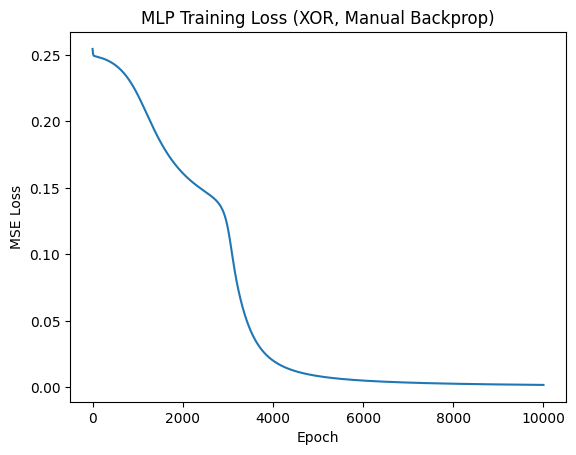

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

# Initialize weights and biases
np.random.seed(0)
W1 = np.random.randn(2,2) * 0.5
b1 = np.zeros((1,2))
W2 = np.random.randn(2,1) * 0.5
b2 = np.zeros((1,1))

lr = 0.25
epochs = 10001
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1  # (4,2)
    h = sigmoid(z1)   # (4,2)
    z2 = h @ W2 + b2  # (4,1)
    y_pred = sigmoid(z2) # (4,1)
    # Loss (mean squared error)
    loss = np.mean((y_pred - y)**2)
    losses.append(loss)
    # Backward pass
    dL_dy_pred = 2 * (y_pred - y) / y.shape[0]
    dL_dz2 = dL_dy_pred * sigmoid_deriv(z2)
    dL_dW2 = h.T @ dL_dz2
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
    dL_dh = dL_dz2 @ W2.T
    dL_dz1 = dL_dh * sigmoid_deriv(z1)
    dL_dW1 = X.T @ dL_dz1
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
    # Update weights and biases
    W2 -= lr * dL_dW2
    b2 -= lr * dL_db2
    W1 -= lr * dL_dW1
    b1 -= lr * dL_db1
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final predictions
y_pred_final = (y_pred > 0.5).astype(int).flatten()
print("\nInput\tPredicted (MLP trained)")
for x, yp in zip(X, y_pred_final):
    print(f"{x}\t{yp}")

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('MLP Training Loss (XOR, Manual Backprop)')
plt.show()

**Results:**
- The manually implemented MLP with backpropagation successfully learns the XOR function, as shown by the predictions and the decreasing loss curve.
- This demonstrates how backpropagation enables neural networks to learn complex, non-linear mappings from data.

## Summary and Next Steps
- You learned the theory and mathematics behind backpropagation.
- You implemented backpropagation manually for a simple MLP and saw it solve the XOR problem.
- Backpropagation is the foundation for training all modern neural networks, from MLPs to deep convolutional and recurrent networks.

**Next steps:**
- Explore vectorized and more efficient implementations of backpropagation.
- Learn about automatic differentiation and frameworks like TensorFlow and PyTorch.
- Apply backpropagation to deeper networks and real-world datasets.